# Data Science Project
### Aleena Kynat

## IMDb Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./movielens/movies.csv', sep=',')
data1= pd.read_csv('./movielens/links.csv', sep=',')
data2= pd.read_csv('./movielens/ratings.csv', sep=',')
data3=pd.read_csv('./movielens/tags.csv',sep=',')

In [3]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data1.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
data2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
data3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Cleaning Data

First I decide to fix the timestamp format.

In [7]:
data3['timestamp'] = pd.to_datetime(data3['timestamp'], unit='s')
data2['timestamp'] = pd.to_datetime(data2['timestamp'], unit='s')

I want to combine all these files into one dataframe based on the common column, movieID. So,

In [8]:
movie=data.merge(data1, how='inner', on='movieId').merge(data2, how='inner',on='movieId').merge(data3, how='outer',on=['movieId','timestamp','userId'])
movie


,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,1,4.0,2000-07-30 18:45:03,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,5,4.0,1996-11-08 06:36:02,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,7,4.5,2005-01-25 06:52:26,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,15,2.5,2017-11-13 12:59:30,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,17,4.5,2011-05-18 05:28:03,NaN
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,18,3.5,2016-02-11 16:56:56,NaN
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,19,4.0,2000-08-08 03:33:57,NaN
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,21,3.5,2014-08-09 21:14:38,NaN
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,27,3.0,2000-07-04 04:34:22,NaN
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,31,5.0,1996-12-13 08:43:36,NaN


In [9]:
movie.groupby('title').count()

,movieId,genres,imdbId,tmdbId,userId,rating,timestamp,tag
title,,,,,,,,
'71 (2014),1,1,1,1,1,1,1,0
'Hellboy': The Seeds of Creation (2004),1,1,1,1,1,1,1,0
'Round Midnight (1986),2,2,2,2,2,2,2,0
'Salem's Lot (2004),1,1,1,1,1,1,1,0
'Til There Was You (1997),2,2,2,2,2,2,2,0
'Tis the Season for Love (2015),1,1,1,1,1,1,1,0
"'burbs, The (1989)",17,17,17,17,17,17,17,0
'night Mother (1986),1,1,1,1,1,1,1,0
(500) Days of Summer (2009),42,42,42,42,42,42,42,0


In [10]:
movie.isnull().any()

movieId      False
title         True
genres        True
imdbId        True
tmdbId        True
userId       False
rating        True
timestamp    False
tag           True
dtype: bool

I can see that there is a rating for each movie ID but some are missing the movie title, genre and tag (among other things). I want to explore the movie ratings over time based on the genres, so I have no need for the ratings without it. I choose to drop the rows(ratings) without any specified genre.

It has also come to my attention that the rows without any specified genre have tags, but I will choose to drop those anyway since the tags do not necessarily correlate with a proper genre that would be used to later classify and read this data.

In [11]:
movie.shape

(104519, 9)

In [12]:
movie.dropna(subset=['genres'],inplace=True)

In [13]:
movie.shape

(100836, 9)

I have dropped almost 4000 rows.

In [14]:
movie.drop('tag',axis=1,inplace=True)

In [15]:
movie.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,1,4.0,2000-07-30 18:45:03
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,5,4.0,1996-11-08 06:36:02
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,7,4.5,2005-01-25 06:52:26
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,15,2.5,2017-11-13 12:59:30
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,17,4.5,2011-05-18 05:28:03


In [16]:
movie.isnull().any()

movieId      False
title        False
genres       False
imdbId       False
tmdbId        True
userId       False
rating       False
timestamp    False
dtype: bool

I also choose to drop the tmdbId because I have no use for it (I have the imdbId which is sufficient)
It will not only leave me with less columns to deal with but it will remove the remaining null values in our dataframe.

In [17]:
movie.drop('tmdbId',axis=1,inplace=True)

This completes the cleaning of my data.

### My question is, how has the trend of different movie genres evolved over time? I want to explore how movie ratings have changed and see what people of different times/generations like(d) to watch, based on genre.
**I would not only like to visualize this trend but I want to see how we could arrange this data to build a classification model that will predict the likely rating of a movie as high (above 3.5) or low (below 3.5) based on it's genre and year of rating.**

First I want to change the timestamp to year only and add a column for the movie release year.

In [18]:
movie['rev_year'] = pd.DatetimeIndex(movie['timestamp']).year
movie['release_year'] = movie['title'].str.extract('.*\((.*)\).*', expand=True)

In [19]:
movie

,movieId,title,genres,imdbId,userId,rating,timestamp,rev_year,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,1,4.0,2000-07-30 18:45:03,2000,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,5,4.0,1996-11-08 06:36:02,1996,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,7,4.5,2005-01-25 06:52:26,2005,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,15,2.5,2017-11-13 12:59:30,2017,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,17,4.5,2011-05-18 05:28:03,2011,1995
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,18,3.5,2016-02-11 16:56:56,2016,1995
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,19,4.0,2000-08-08 03:33:57,2000,1995
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,21,3.5,2014-08-09 21:14:38,2014,1995
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,27,3.0,2000-07-04 04:34:22,2000,1995
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,31,5.0,1996-12-13 08:43:36,1996,1995


In [20]:
ungen=movie['genres'].unique()

In [21]:
ungen

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

I want to create a list of the unique genres, not the combinations.

In [22]:
import re
from bs4 import BeautifulSoup 
words=[]
for i in range(len(ungen)):
    review_text = BeautifulSoup(ungen[i]).get_text() 
#Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
#split into individual words
    words.append(letters_only.split())
words

C:\Users\aleen\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\aleen\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Sci', 'Fi'],
 ['Children', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci', 'Fi'],
 ['Mystery', 'Sci', 'Fi', 'Thriller'],
 ['Children', 'Comedy'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Mystery', 'Thriller'],
 ['Animation', 'Children', 'Drama', 'Musical', 'Romance'],
 ['Crime', 'Mystery', 'Thriller'],
 ['A

In [23]:
flat_list = [item for sublist in words for item in sublist]

In [24]:
unique_genres=pd.Series(flat_list).unique()

In [25]:
unique_genres=pd.Series(unique_genres)

In [26]:
unique_genres

0       Adventure
1       Animation
2        Children
3          Comedy
4         Fantasy
5         Romance
6           Drama
7          Action
8           Crime
9        Thriller
10         Horror
11        Mystery
12            Sci
13             Fi
14            War
15        Musical
16    Documentary
17           IMAX
18        Western
19           Film
20           Noir
21             no
22         genres
23         listed
dtype: object

In [27]:
unique_genres.drop(labels=[13,21,22,23],axis=0,inplace=True)
unique_genres[12]='Sci-Fi'
unique_genres

0       Adventure
1       Animation
2        Children
3          Comedy
4         Fantasy
5         Romance
6           Drama
7          Action
8           Crime
9        Thriller
10         Horror
11        Mystery
12         Sci-Fi
14            War
15        Musical
16    Documentary
17           IMAX
18        Western
19           Film
20           Noir
dtype: object

Now I want to compare genre with the average ratings over time

In [28]:
dfmov=movie.groupby(['release_year','rev_year','genres'])['rating'].mean().reset_index()
dfmov

,release_year,rev_year,genres,rating
0,1902,2014,Action|Adventure|Fantasy|Sci-Fi,3.000000
1,1902,2015,Action|Adventure|Fantasy|Sci-Fi,4.500000
2,1902,2017,Action|Adventure|Fantasy|Sci-Fi,3.000000
3,1902,2018,Action|Adventure|Fantasy|Sci-Fi,3.500000
4,1903,2015,Crime|Western,4.000000
5,1903,2018,Crime|Western,1.000000
6,1908,2018,Animation|Comedy|Sci-Fi,4.000000
7,1915,2015,Drama|War,2.000000
8,1916,2010,Fantasy|Romance,3.500000
9,1916,2012,Action|Adventure|Sci-Fi,3.750000


Now to seperate the genres

In [29]:
dfgenr=pd.DataFrame()

In [30]:
dfgenr['Genre']=unique_genres

In [31]:
dfgenres=pd.DataFrame()
for i in unique_genres.index:
    is_genre = dfmov['genres'].str.contains(unique_genres[i])
    ng=dfmov[is_genre].reset_index()
    ng['Genre']=unique_genres[i]
    dfgenres=pd.concat([dfgenres,ng],axis=0)

In [32]:
dfgenres.drop('index',axis=1,inplace=True)

In [33]:
dfgenres.drop('genres',axis=1,inplace=True)

In [34]:
dfgenres=dfgenres.groupby(['Genre','rev_year'])['rating'].mean().reset_index()
dfgenres.head()

,Genre,rev_year,rating
0,Action,1996,3.447101
1,Action,1997,3.666970
2,Action,1998,3.221900
3,Action,1999,3.457763
4,Action,2000,3.021668


In [35]:
dfgenres.loc[dfgenres['Genre'] == 'Horror']

,Genre,rev_year,rating
229,Horror,1996,3.492373
230,Horror,1997,3.410057
231,Horror,1998,3.183333
232,Horror,1999,3.057143
233,Horror,2000,2.745627
234,Horror,2001,3.068707
235,Horror,2002,3.461495
236,Horror,2003,2.997064
237,Horror,2004,3.168106
238,Horror,2005,3.033269


I finally have the dataframe that I am going to use for visualization. However, for convenience in visualization, I decide to split it into two.

In [36]:
dfgenres1=dfgenres.iloc[:228,:]
dfgenres2=dfgenres.iloc[228:,:]

In [37]:
dfgenres1.reset_index()

,index,Genre,rev_year,rating
0,0,Action,1996,3.447101
1,1,Action,1997,3.666970
2,2,Action,1998,3.221900
3,3,Action,1999,3.457763
4,4,Action,2000,3.021668
5,5,Action,2001,3.361103
6,6,Action,2002,3.459722
7,7,Action,2003,3.163148
8,8,Action,2004,3.317527
9,9,Action,2005,3.291679


In [38]:
dfgenres2['Genre'].unique()

array(['Film', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Noir', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

## Visualization
#### Movie Genre Ratings Based of year of review/watched

### Scatter Plot

In [39]:
col = {'Action':'red','Adventure':'cyan','Animation':'green','Children':'brown','Comedy':'blue','Crime':'maroon','Fantasy':'yellow','Documentary':'orange','Drama':'black','Film':'magenta'}
col2={'Film':'maroon','Horror':'cyan','IMAX':'black','Musical':'yellow','Mystery':'red','Noir':'magenta','Sci-Fi':'green','War':'blue','Romance':'orange','Western':'brown','Thriller':'brown'}

In [40]:
dfgenres1['col']=dfgenres1['Genre'].map(col)
dfgenres2['col']=dfgenres2['Genre'].map(col2)

C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


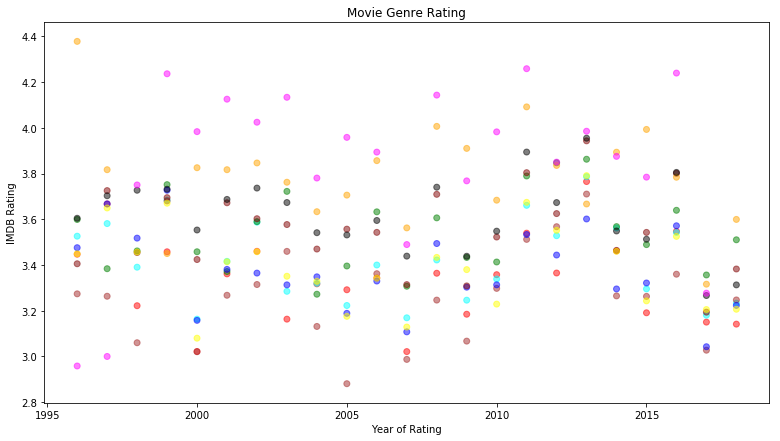

In [41]:
plt.figure(figsize=(13,7))
plt.scatter([dfgenres1['rev_year']],[dfgenres1['rating']], c=dfgenres1['col'], alpha=0.5)
#plt.legend(dfgenres1['Genre'], dfgenres1['col'])
plt.title('Movie Genre Rating')
plt.xlabel('Year of Rating')
plt.ylabel('IMDB Rating')

plt.show()

In [42]:
col

{'Action': 'red',
 'Adventure': 'cyan',
 'Animation': 'green',
 'Children': 'brown',
 'Comedy': 'blue',
 'Crime': 'maroon',
 'Fantasy': 'yellow',
 'Documentary': 'orange',
 'Drama': 'black',
 'Film': 'magenta'}

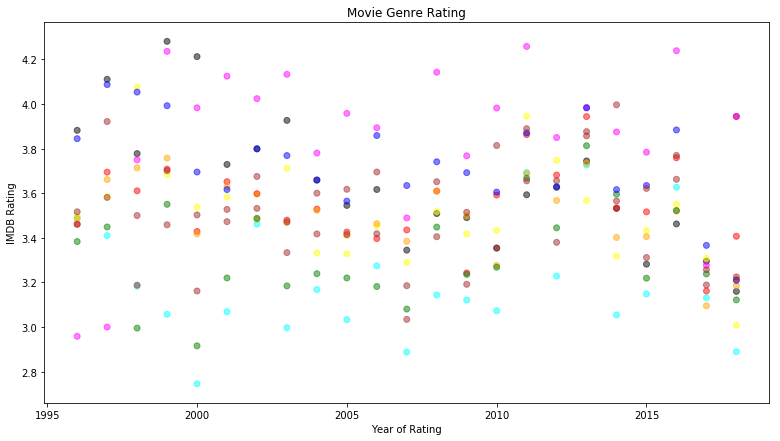

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure(figsize=(13,7))
plt.scatter([dfgenres2['rev_year']],[dfgenres2['rating']], c=dfgenres2['col'], alpha=0.5)
plt.title('Movie Genre Rating')
plt.xlabel('Year of Rating')
plt.ylabel('IMDB Rating')
plt.show()
#plt.savefig('image')

In [50]:
col2

{'Film': 'maroon',
 'Horror': 'cyan',
 'IMAX': 'black',
 'Musical': 'yellow',
 'Mystery': 'red',
 'Noir': 'magenta',
 'Sci-Fi': 'green',
 'War': 'blue',
 'Romance': 'orange',
 'Western': 'brown',
 'Thriller': 'brown'}

I feel that a line graph would better suit this data, so,

### Line Plot

C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  after removing the cwd from sys.path.


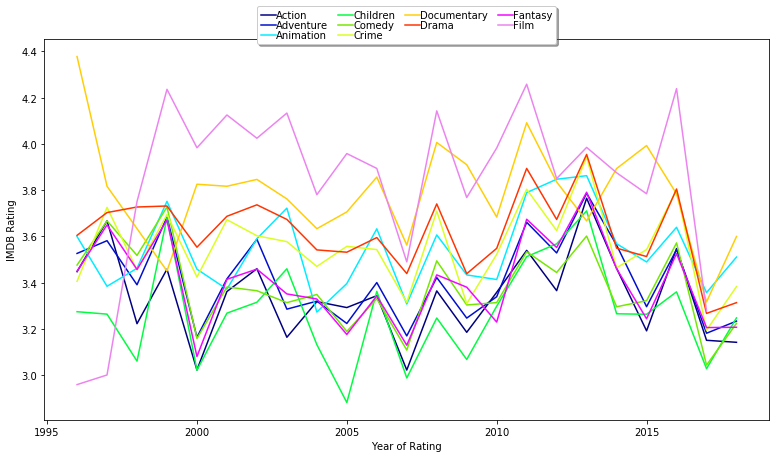

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure(figsize=(13,7))
num_plots=10
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

labels = dfgenres1['Genre'].unique()
for i in range(len(labels)):
    is_genre = dfgenres1['Genre'].str.contains(labels[i])
    ng=dfgenres1[is_genre].reset_index()
    x=ng['rev_year']
    y=ng['rating']
    plt.plot(x,y)

plt.title('Movie Genre Rating')
plt.xlabel('Year of Rating')
plt.ylabel('IMDB Rating')
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()
#plt.savefig('image2')

C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  after removing the cwd from sys.path.


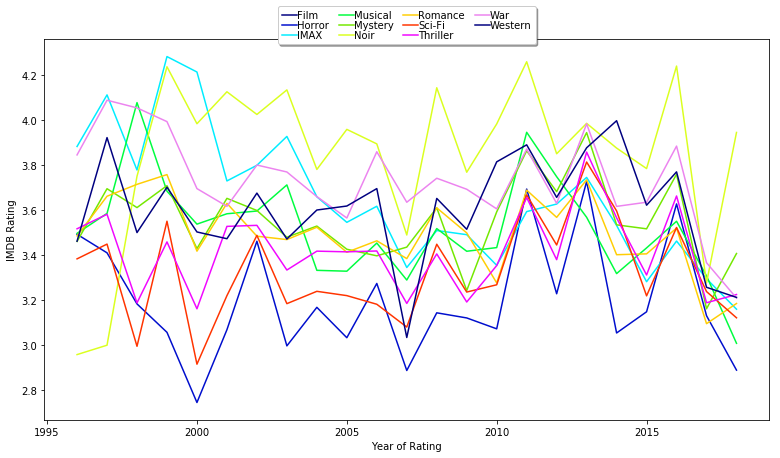

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure(figsize=(13,7))
num_plots=10
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

labels = dfgenres2['Genre'].unique()
for i in range(len(labels)):
    is_genre = dfgenres2['Genre'].str.contains(labels[i])
    ng=dfgenres2[is_genre].reset_index()
    x=ng['rev_year']
    y=ng['rating']
    plt.plot(x,y)

plt.title('Movie Genre Rating')
plt.xlabel('Year of Rating')
plt.ylabel('IMDB Rating')
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()
#plt.savefig('image1')

The scatter plot may not have been as clear about the movie trends/genre ratings over time, so I used the line graph. It is clear that there is no consistent incline/decline in any of the genres over the past 20+ years but all the movie ratings seem to spike or dip around the same time, leading me to believe that the general rating trends have more to do with the year of review rather than the taste of different generations. It mostly seems to be an overall interest/disinterest in movies altogether over time and not much to do with genres.
It can be noted that there is steep decline in movie ratings for all movies (in both graphs) around 2007 so it was not a good year for movies. However, it is also worth noting that IMAX, Noir and Film really peaked around 2000, while Western and Sci-Fi met their lowest points. Similarly, Musicals met their peak ratings around 1997 while other genres declined. We can observe other contrasting trends in genres at some points that can support the belief that some genres tend to trend with certain years, but the major factor affecting ratings tends to be the year of review for _all_ genres.

### Bar Graph
#### of overall movie ratings based on genre (without the year)

In [53]:
br=dfgenres.groupby(['Genre'])['rating'].mean().reset_index()
br

,Genre,rating
0,Action,3.340829
1,Adventure,3.414686
2,Animation,3.541598
3,Children,3.272323
4,Comedy,3.379106
5,Crime,3.553564
6,Documentary,3.792228
7,Drama,3.617955
8,Fantasy,3.400002
9,Film,3.845077


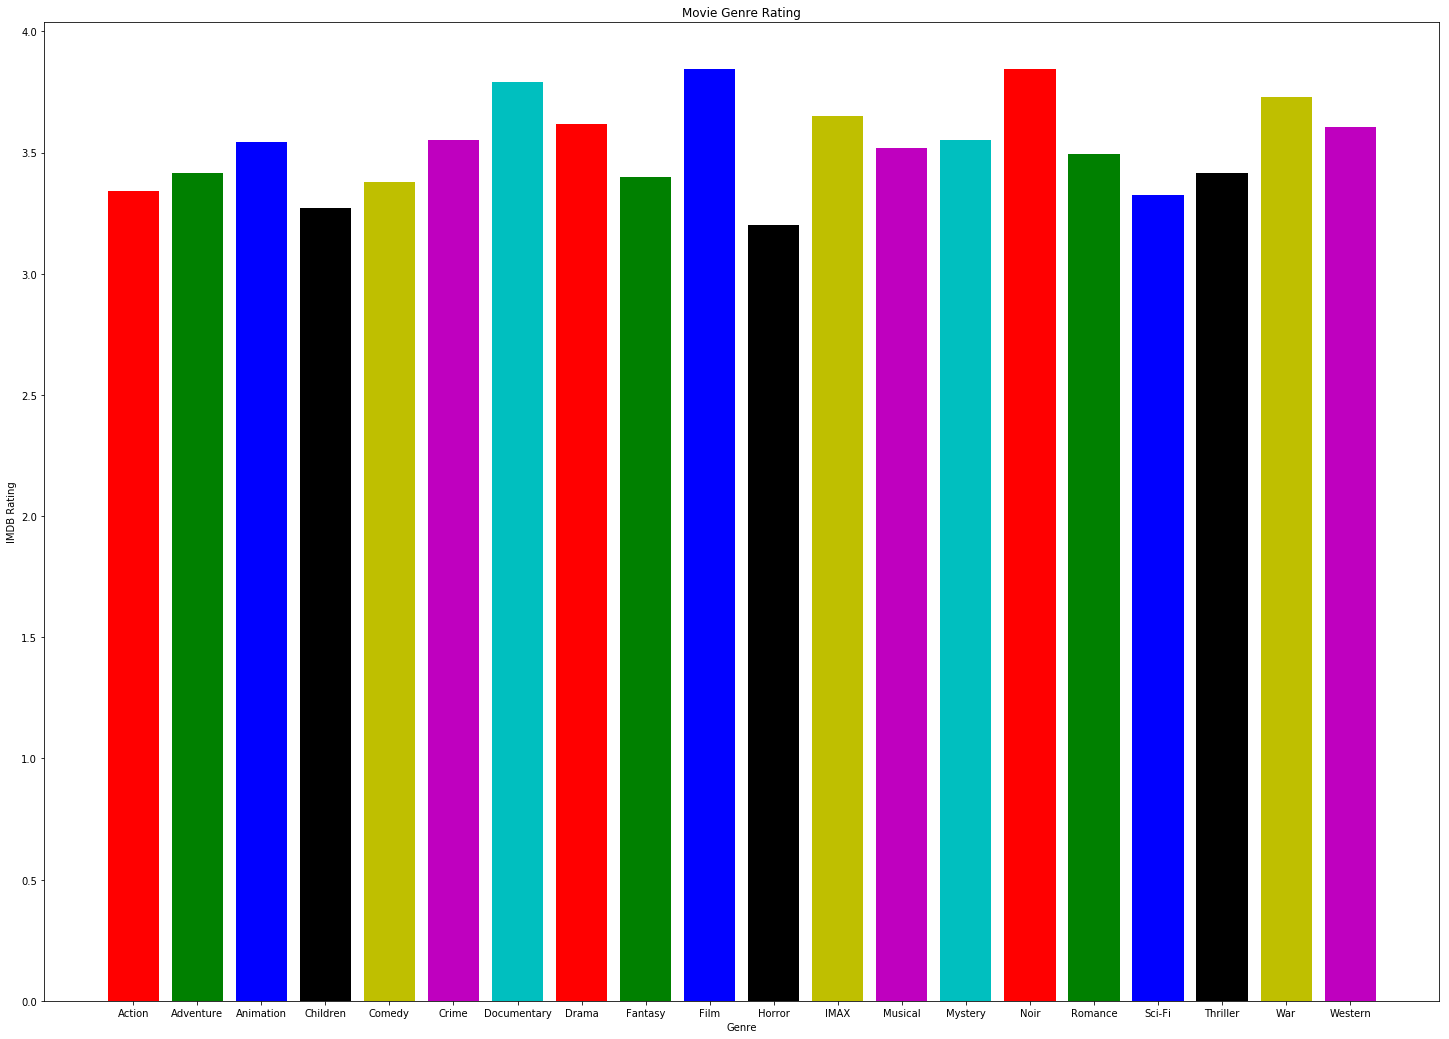

<Figure size 432x288 with 0 Axes>

In [69]:
plt.figure(figsize=(25,18))
plt.bar(br['Genre'],br['rating'],color='rgbkymc')
plt.title('Movie Genre Rating')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.show();
#plt.savefig('image3')

#### Movie Genre Ratings Based of year of release

In [55]:
dfrelease=pd.DataFrame()
for i in unique_genres.index:
    is_genre = dfmov['genres'].str.contains(unique_genres[i])
    ng=dfmov[is_genre].reset_index()
    ng['Genre']=unique_genres[i]
    dfrelease=pd.concat([dfrelease,ng],axis=0)

In [56]:
dfrelease.drop(['index','genres'],axis=1,inplace=True)

In [57]:
dfrelease=dfrelease.groupby(['Genre','release_year'])['rating'].mean().reset_index()
dfrelease

,Genre,release_year,rating
0,Action,1902,3.500000
1,Action,1916,3.750000
2,Action,1923,4.000000
3,Action,1924,4.000000
4,Action,1930,4.250000
5,Action,1931,4.250000
6,Action,1933,3.441558
7,Action,1935,4.000000
8,Action,1937,2.500000
9,Action,1938,3.944444


In [58]:
dfrel1=dfrelease.iloc[:766,:]
dfrel2=dfrelease.iloc[766:,:]

C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  after removing the cwd from sys.path.


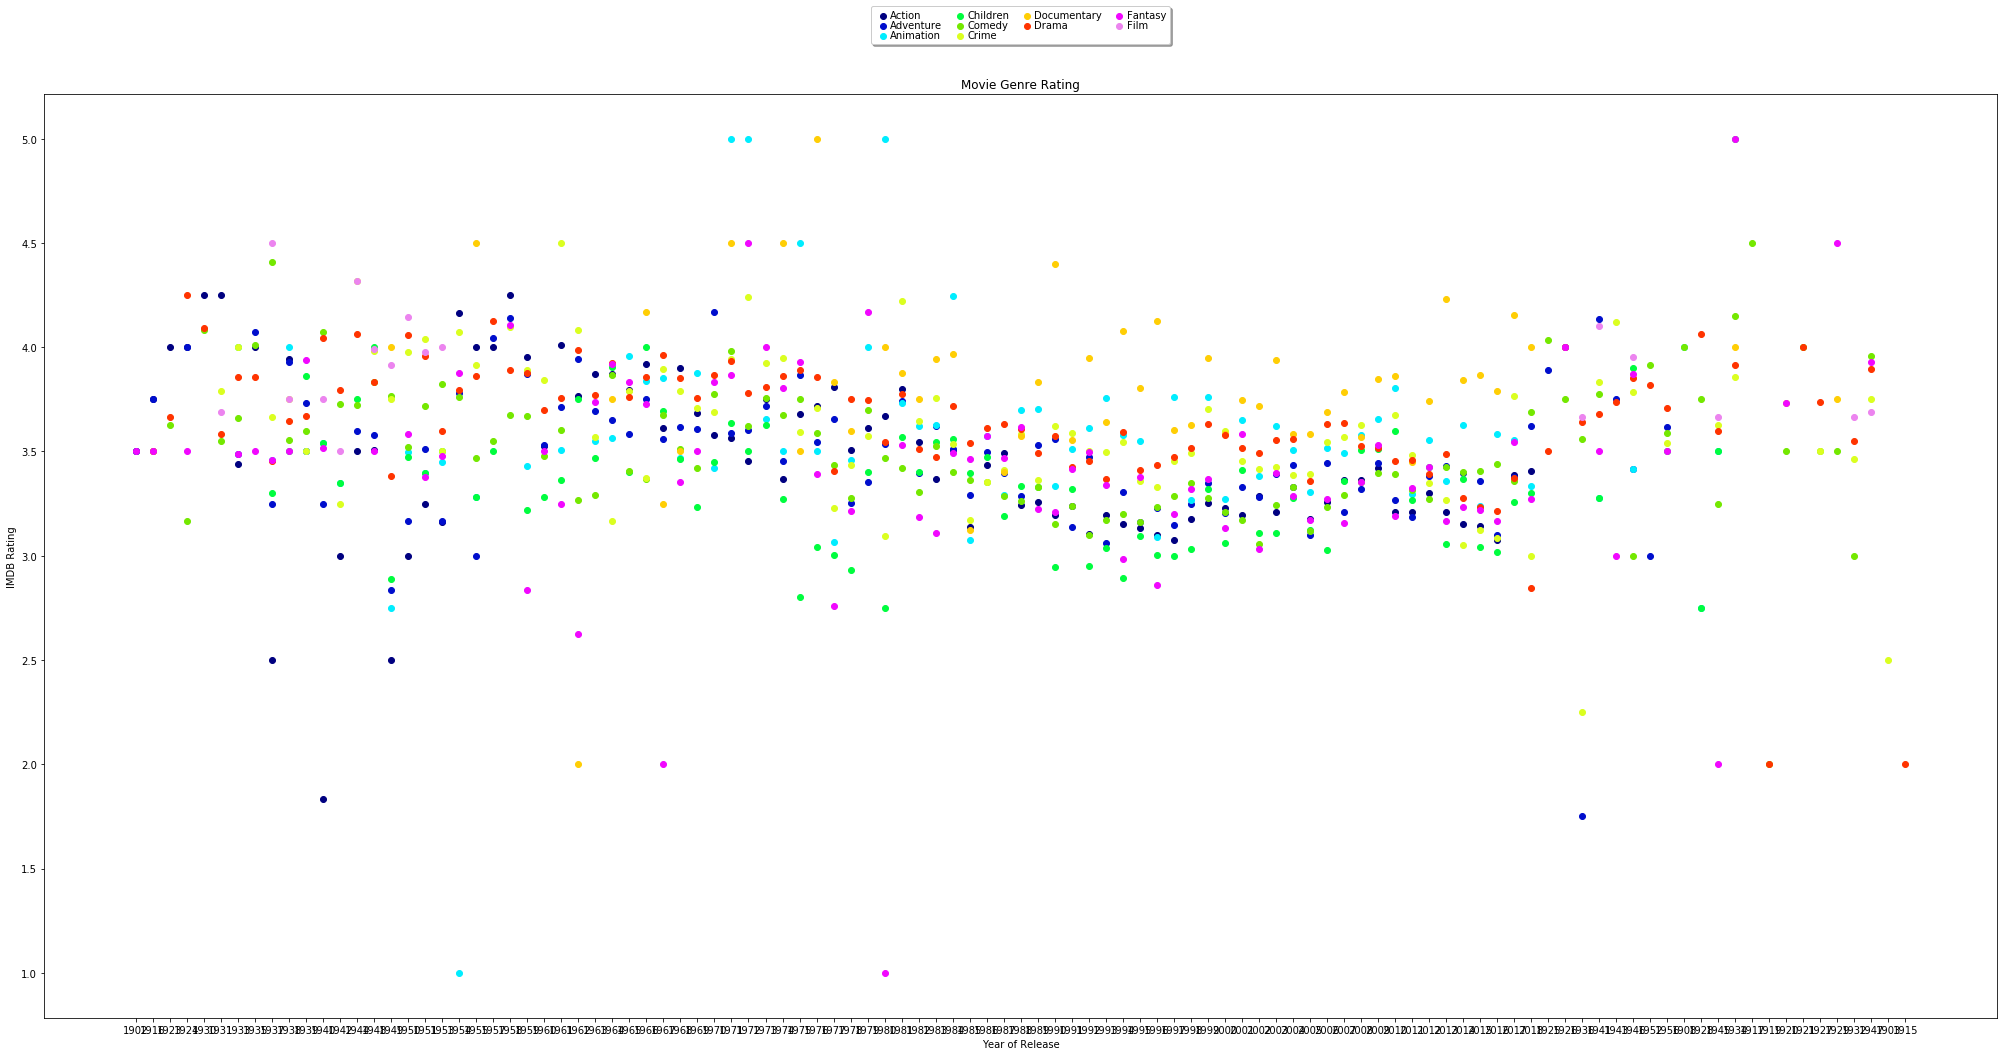

In [59]:
plt.figure(figsize=(35,17))
num_plots=10
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

labels = dfrel1['Genre'].unique()
for i in range(len(labels)):
    is_genre = dfrel1['Genre'].str.contains(labels[i])
    ng=dfrel1[is_genre].reset_index()
    x=ng['release_year']
    y=ng['rating']
    plt.scatter(x,y)

plt.title('Movie Genre Rating')
plt.xlabel('Year of Release')
plt.ylabel('IMDB Rating')
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()


C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  after removing the cwd from sys.path.


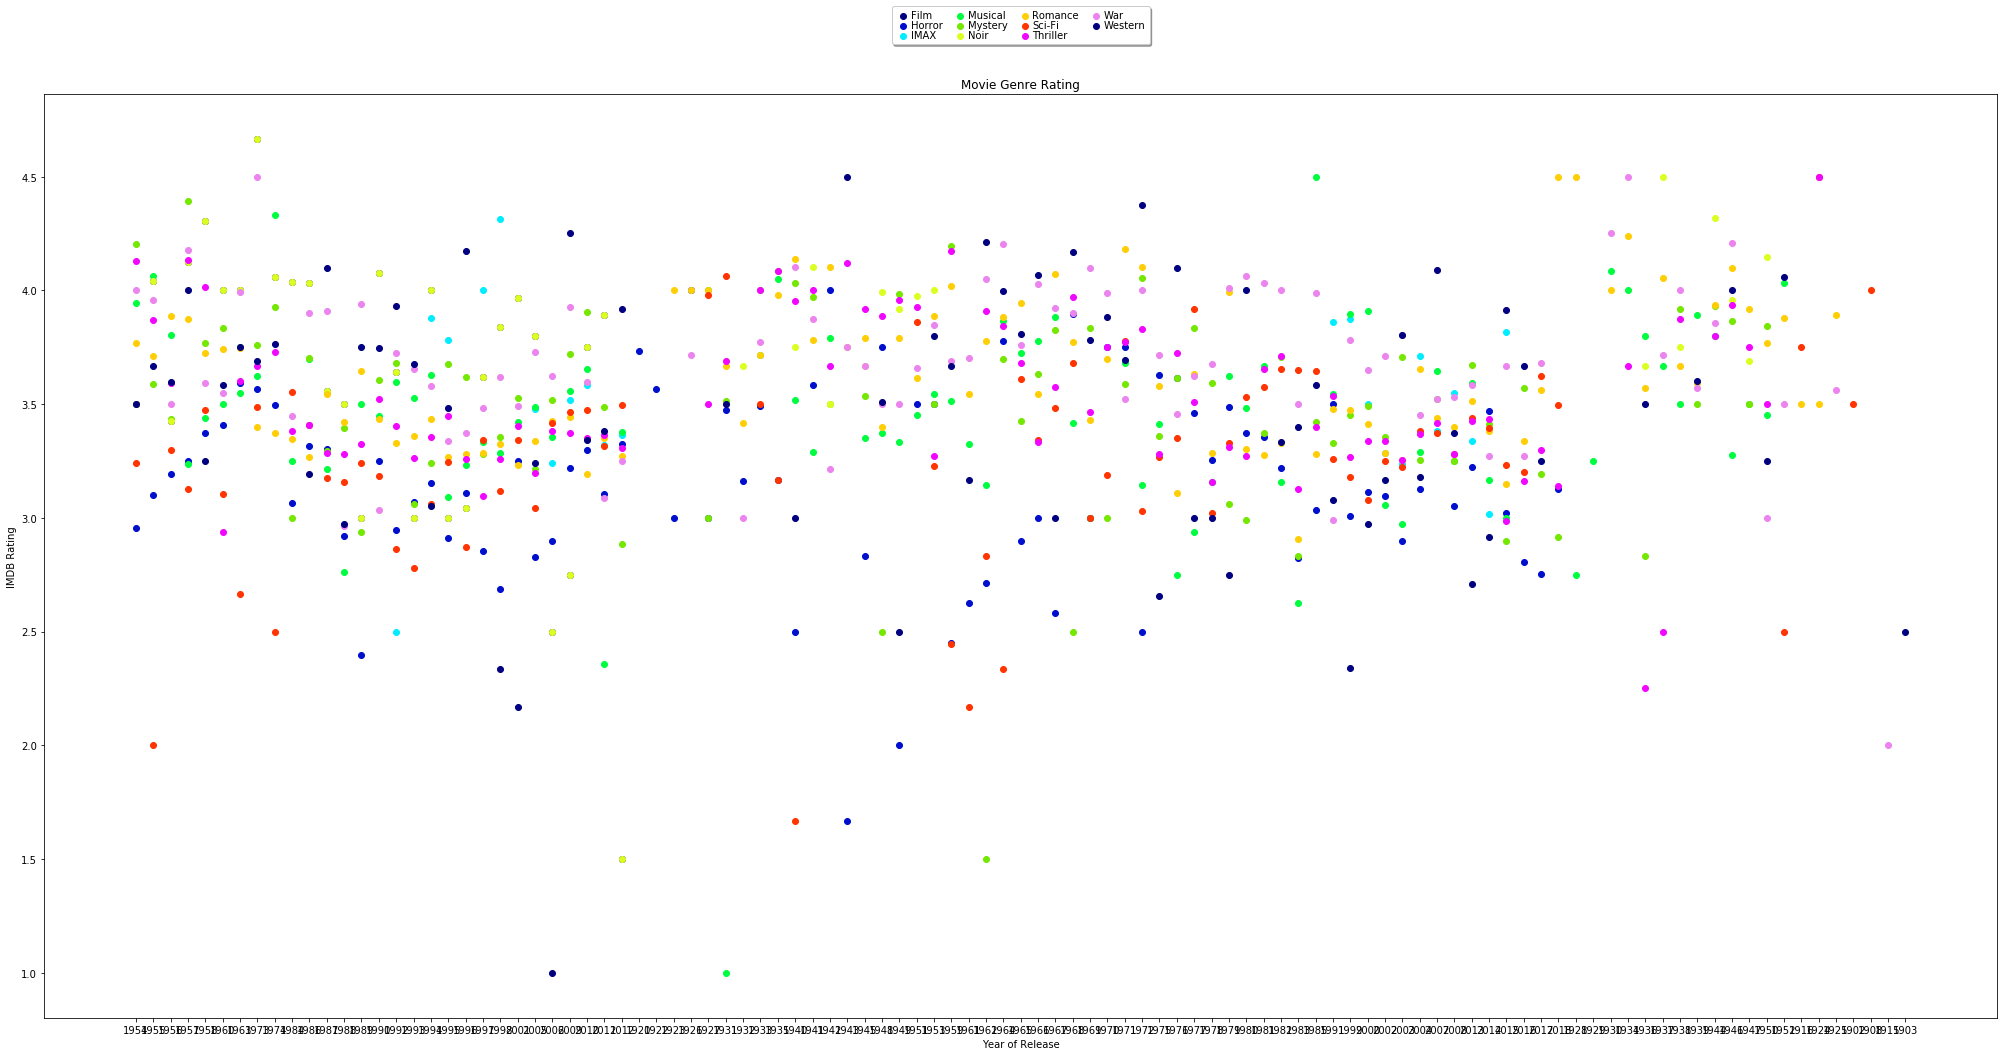

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize=(35,17))
num_plots=10
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

labels = dfrel2['Genre'].unique()
for i in range(len(labels)):
    is_genre = dfrel2['Genre'].str.contains(labels[i])
    ng=dfrel2[is_genre].reset_index()
    x=ng['release_year']
    y=ng['rating']
    plt.scatter(x,y)

plt.title('Movie Genre Rating')
plt.xlabel('Year of Release')
plt.ylabel('IMDB Rating')
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()
#plt.savefig('image4')

Based on year of release we can view a much different pattern in movie ratings. There are many extreme values and no general trend of incline or decline in movie ratings at all which re-affirms my earlier assumption that year of review is more relevant in predicting the trends of movie ratings than year of release. The general taste for movies and its' genres is better told by the time the movie is reviewed/watched.

In [61]:
#dfgenres

Now I will arrange the data to see if I can build a classification model on this dataset, with Genre and year of rating as my feautures and good rating (above 3.5) and bad rating (below 3.5) as my binary classes.

In [62]:
from scipy.optimize import minimize

X2=dfgenres['Genre']
X1=dfgenres['rev_year']
X=['X1','X2']

dfgenres['y']=pd.Series()
for i in dfgenres.index:
    if dfgenres['rating'][i]>3.5:
        dfgenres['y'][i]=1
    else:
        dfgenres['y'][i]=0
        
pos=dfgenres.loc[dfgenres['y']==1]
neg=dfgenres.loc[dfgenres['y']==0]


C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\aleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


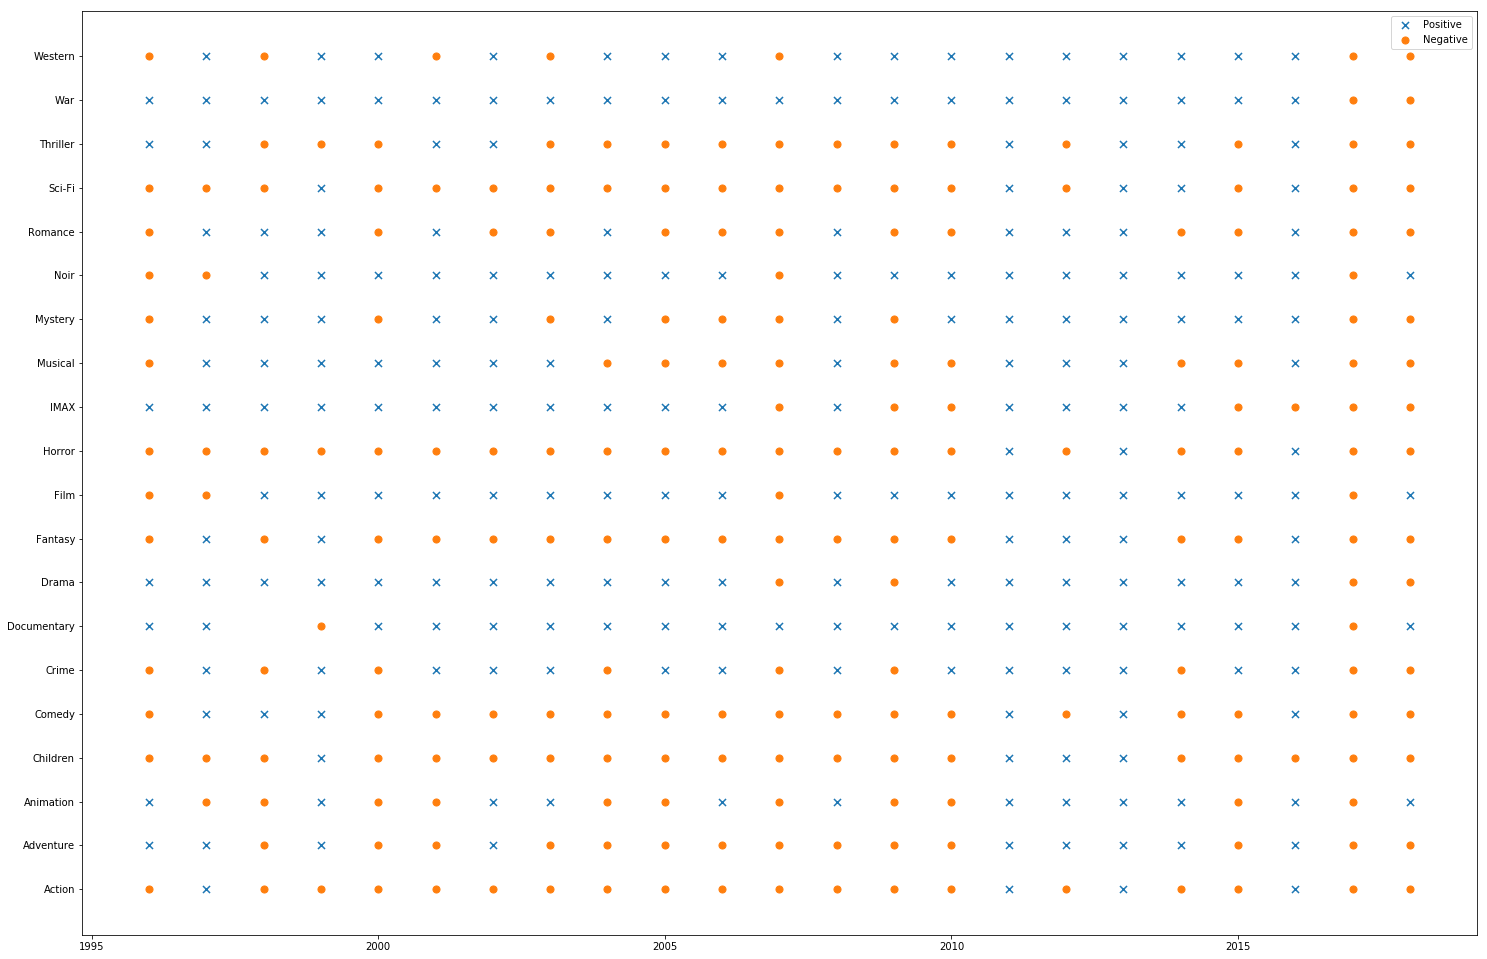

In [67]:
fig, ax = plt.subplots(figsize=(25,17))  
ax.scatter(pos['rev_year'], pos['Genre'], s=50, marker='x', label='Positive')  
ax.scatter(neg['rev_year'], neg['Genre'], s=50, marker='o', label='Negative')  
ax.legend()  
plt.savefig('image5')

This is the visualization of the dataset on which we can build a classification model. We could use neural networks but that would get tedious. A Support Vector Machine(SVM) Model could work with a transformation kernel, since this data is obviously not linearly separable. This makes the classification models training quite a complex process so let us not get into its' details.

We have reached our end results about the movie rating trends based on genre above and have now also seen how the dataset could be trasnformed to potentially build a classification model to predict the ratings of movies based on their genre and year watched/of review.

In [64]:
#from sklearn.feature_extraction.text import CountVectorizer 
#vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000)

#X2=dfgenres['Genre']
#X1=dfgenres['rev_year']
#X=['X1','X2']
#X1=vectorizer.fit_transform(X1)
#X1 = X1.toarray() 
#X1.shape

#X2=vectorizer.fit_transform(X2)
#X2 = X2.toarray() 
#X2.shape

In [65]:
#from sklearn import svm 
#svc = svm.LinearSVC(C=1, loss='hinge', max_iter=10000)
#svc.fit(dfgenres[['rev_year', 'Genre']], dfgenres['y'])
#svc.score(dfgenres[['rev_year', 'Genre']], dfgenres['y']) 

In [66]:
#data['SVM 1 Confidence'] = svc.decision_function(data[[X1, X2]])

#fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter(dfgenres['rev_year'], dfgenres['Genre'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
#ax.set_title('SVM (C=1) Decision Confidence')